In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML/Employee_Salary.csv")

In [4]:
df.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [5]:
df.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [7]:
X = df[['Years of Experience']]

In [8]:
y = df['Salary']

In [9]:
X_train = X
y_train = y

In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()

In [13]:
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
print('Linear Model coefficient (m):', regressor.coef_)
print('Linear Model coefficient (c):', regressor.intercept_)

Linear Model coefficient (m): [11640.22916165]
Linear Model coefficient (c): -13063.099315186948


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

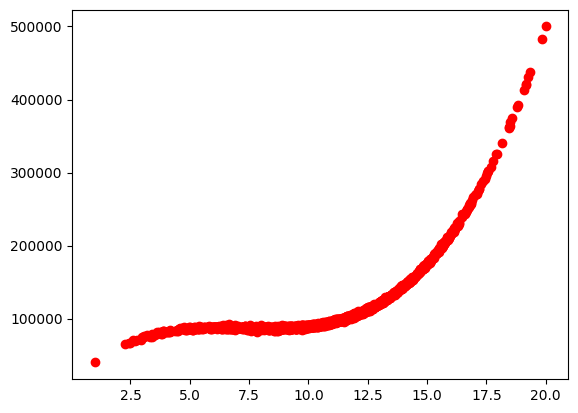

In [16]:
plt.scatter(X_train, y_train, color = 'red')

In [17]:
predicted = regressor.predict(X_train)

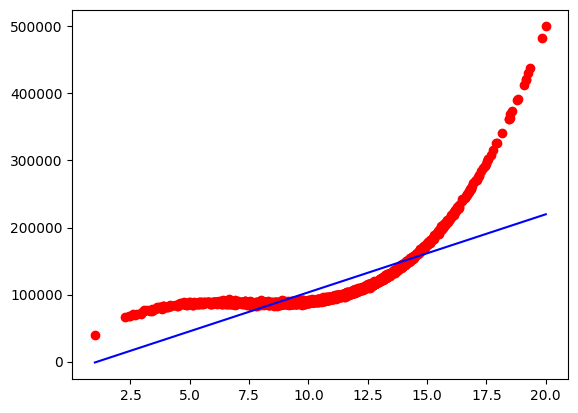

In [19]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, predicted, color = 'blue')

In [20]:
#lets start with polynomial regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 5)

In [36]:
X_columns = poly_features.fit_transform(X_train)

In [37]:
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01,
        2.59926832e+01, 5.86899707e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01,
        3.60815324e+01, 8.84313424e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03,
        1.40289863e+05, 2.71508145e+06],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03,
        1.55019838e+05, 3.07598419e+06],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05, 3.20000000e+06]])

In [38]:
regressor = LinearRegression(fit_intercept = True)

In [39]:
regressor.fit(X_columns, y_train)

LinearRegression()

In [40]:
print("Linear model coeff (C):", regressor.coef_)
print("Linear model intercept:", regressor.intercept_)

Linear model coeff (C): [ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
 -1.03521070e+00  2.09284278e-02]
Linear model intercept: 11462.338087278971


In [41]:
y_predict = regressor.predict(X_columns)

Text(0.5, 0, 'Years of Experience')

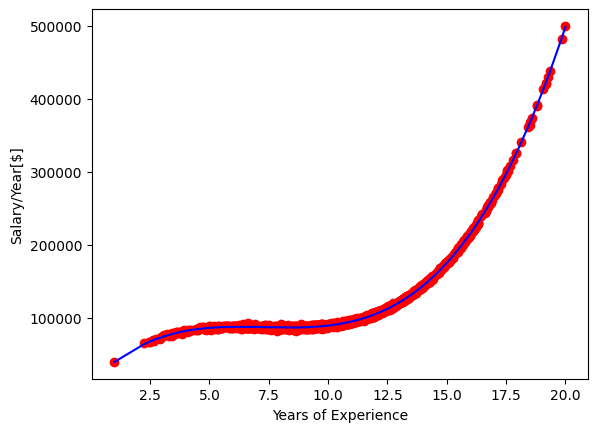

In [42]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict, color = 'blue')
plt.ylabel('Salary/Year[$]')
plt.xlabel('Years of Experience')

In [43]:
#use cross validation to find the perfectly fitting degree to find proper predicted values